In [297]:

import pandas as pd
import matplotlib.pyplot as plt

In [298]:
import seaborn as sns
sns.set_theme()

In [299]:
mpg = sns.load_dataset("mpg")

**THIS IS THE ANALYSIS OF THE FUEL EFFICIENCY OF CARS MANUFACTURED IN VARIOUS COUNTRIES FROM 1970 THROUGH 1982**

**Fuel efficiency shows how much a car can travel with a certain amount of fuel.  In America, this is measured by miles per gallon (mpg).**

**The better the fuel efficiency(higher mpg), the less fuel it takes for a car to run.**

In [175]:
mpg

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
0,18.0,8,307.0,130.0,3504,12.0,70,usa,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,usa,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,usa,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,usa,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,usa,ford torino
...,...,...,...,...,...,...,...,...,...
393,27.0,4,140.0,86.0,2790,15.6,82,usa,ford mustang gl
394,44.0,4,97.0,52.0,2130,24.6,82,europe,vw pickup
395,32.0,4,135.0,84.0,2295,11.6,82,usa,dodge rampage
396,28.0,4,120.0,79.0,2625,18.6,82,usa,ford ranger


**I used the sample dataset above for my observations.**

C:\Users\drmbe\AppData\Local\Temp\ipykernel_21064\3186738444.py:1: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\drmbe\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\drmbe\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


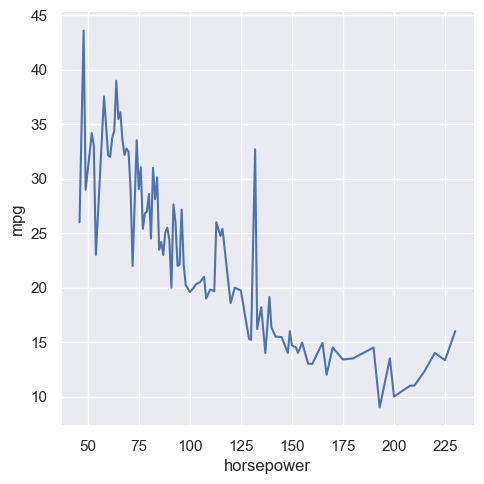

In [302]:
with pd.option_context('mode.use_inf_as_na', True):
     sns.relplot(data=mpg,x="horsepower",y="mpg",kind="line",errorbar=None)

**The above line chart shows the relationship between horsepower and mpg.  Horsepower is the rate at which work can be done.**

**The higher the rate of work, the lower the fuel efficiency.**

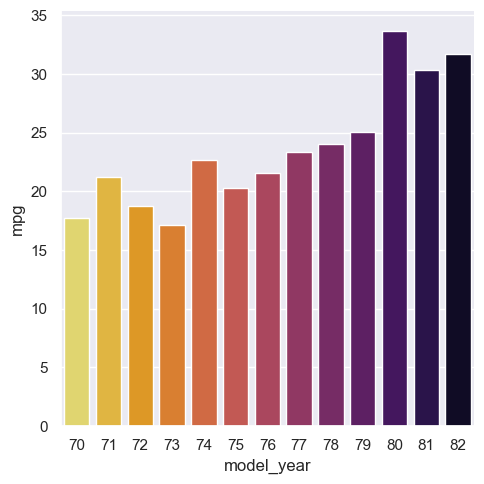

In [233]:
sns.catplot(data=mpg, x="model_year", y="mpg",kind="bar",errorbar=None,palette='inferno_r')

**The fuel efficiency of cars that were manufactured improved over the years**

In [179]:
mpg.groupby('origin')['mpg'].mean().reset_index()

,origin,mpg
0,europe,27.891429
1,japan,30.450633
2,usa,20.083534


In [180]:
mpg_per_country = mpg.groupby('origin')['mpg'].mean().reset_index()

In [181]:
mpg_per_country['mpg'] = mpg_per_country['mpg'].round(1)

In [182]:
mpg_per_country

,origin,mpg
0,europe,27.9
1,japan,30.5
2,usa,20.1


**Above is a table that shows the mean miles per gallon of cars manufactured in various countries in Europe, as well as in Japan and the United States.**

**Below is the visual representation.**

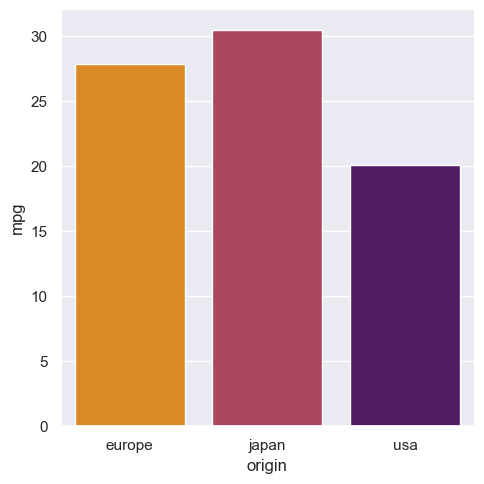

In [184]:
sns.catplot(data=mpg_per_country,x="origin",y="mpg",kind="bar",errorbar=None,palette='inferno_r')

**On the surface,it seems as though cars manufactured in Japan had the best fuel efficiency, followed by the cars manufactured in Europe.**            
**The chart also seems to imply that cars manufactured in the USA had the worst fuel efficiency.**

**WHAT ARE THE FACTORS AFFECTING FUEL EFFICIENCY?**

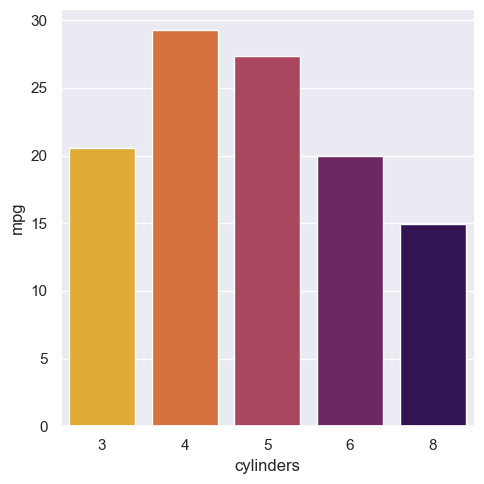

In [301]:
sns.catplot(data=mpg,x="cylinders",y="mpg",kind="bar",errorbar=None,)

**Cars with more cylinders are less fuel efficient than cars with less cylinders.**

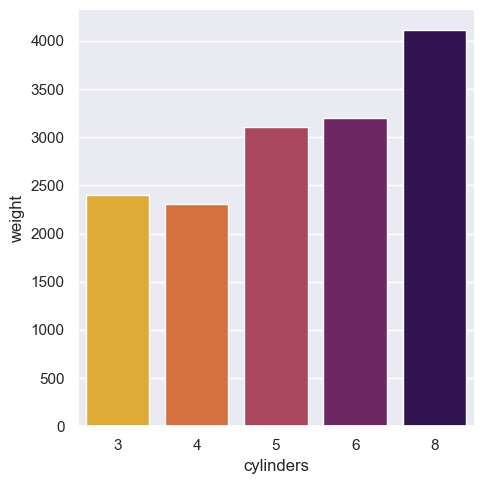

In [146]:
sns.catplot(data=mpg,x="cylinders",y="weight",kind="bar",errorbar=None,palette='inferno_r')

**Also, cars made with more cylinders have increased weight.**

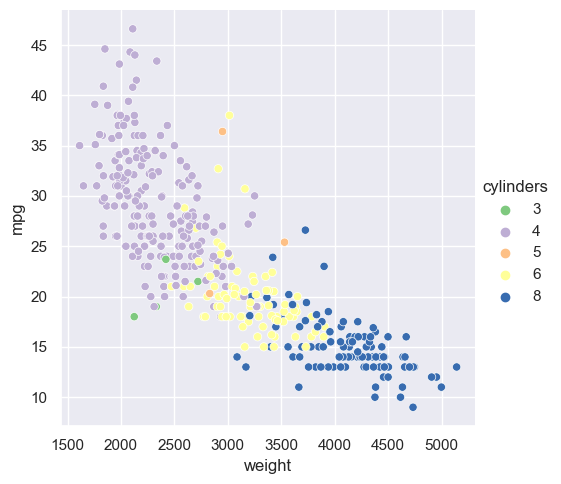

In [268]:
sns.relplot(data=mpg,x="weight",y="mpg",hue="cylinders",palette='Accent')

**Increased weight leads to decreased fuel efficiency.**

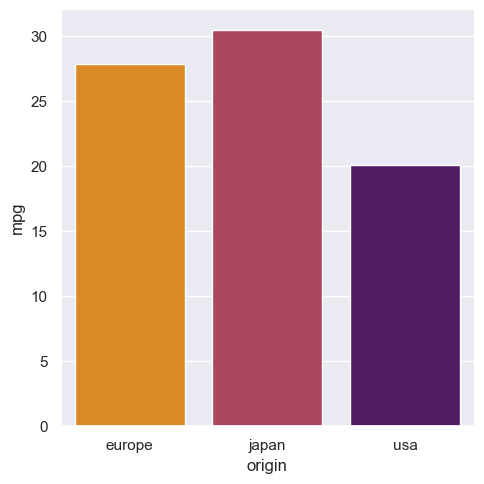

In [261]:
sns.catplot(data=mpg_per_country,x="origin",y="mpg",kind="bar",errorbar=None,palette='inferno_r')

**This is the same chart as the one above comparing the fuel efficiency of cars by the country of origin.**

**But now that we have additional information, let's take a closer look.**

In [244]:
mpg.groupby('origin')['cylinders'].unique()

origin
europe    [4, 6, 5]
japan     [4, 3, 6]
usa       [8, 6, 4]
Name: cylinders, dtype: object

**This table shows the type of cars that each country of origin manufactures by the number of cylinders.**


**Below is the visual representation**

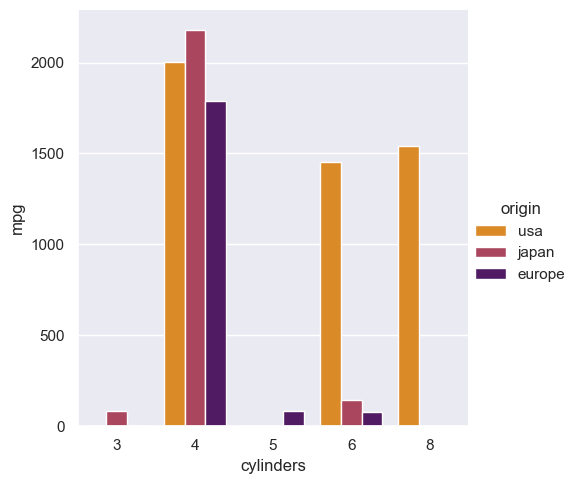

In [260]:
sns.catplot(data=mpg,hue="origin", x="cylinders",y="mpg",kind="bar",estimator="sum",errorbar=None,palette='inferno_r')

**Here you see that Japan and Europe manufactured significantly more 4 cylinder cars, which weigh less and are more fuel efficient.**

**Japan and Europe manufactured very few 6 cylinder cars and no 8 cylinder cars.  These would be the cars that would naturally have lower fuel efficiency due to their increased weight.**

**The USA manufactured almost as many 4 cylinder cars as Japan. But also manufactured a significantly higher amount of 6 cylinder cars.**

**The USA was also the only country that manufactured 8 cylinder vehicles.**

**So overall, the USA manufactured significantly more cars that weighed more and thus had lower fuel efficiency.**